In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium import plugins
import json
sns.set()

In [2]:
import matplotlib
from matplotlib import font_manager, rc
import platform
if platform.system()=="Windows":
    font_name=font_manager.FontProperties(fname="malgun.ttf").get_name()
    rc('font', family=font_name)
matplotlib.rcParams['axes.unicode_minus']=False

import warnings
warnings.filterwarnings("ignore")

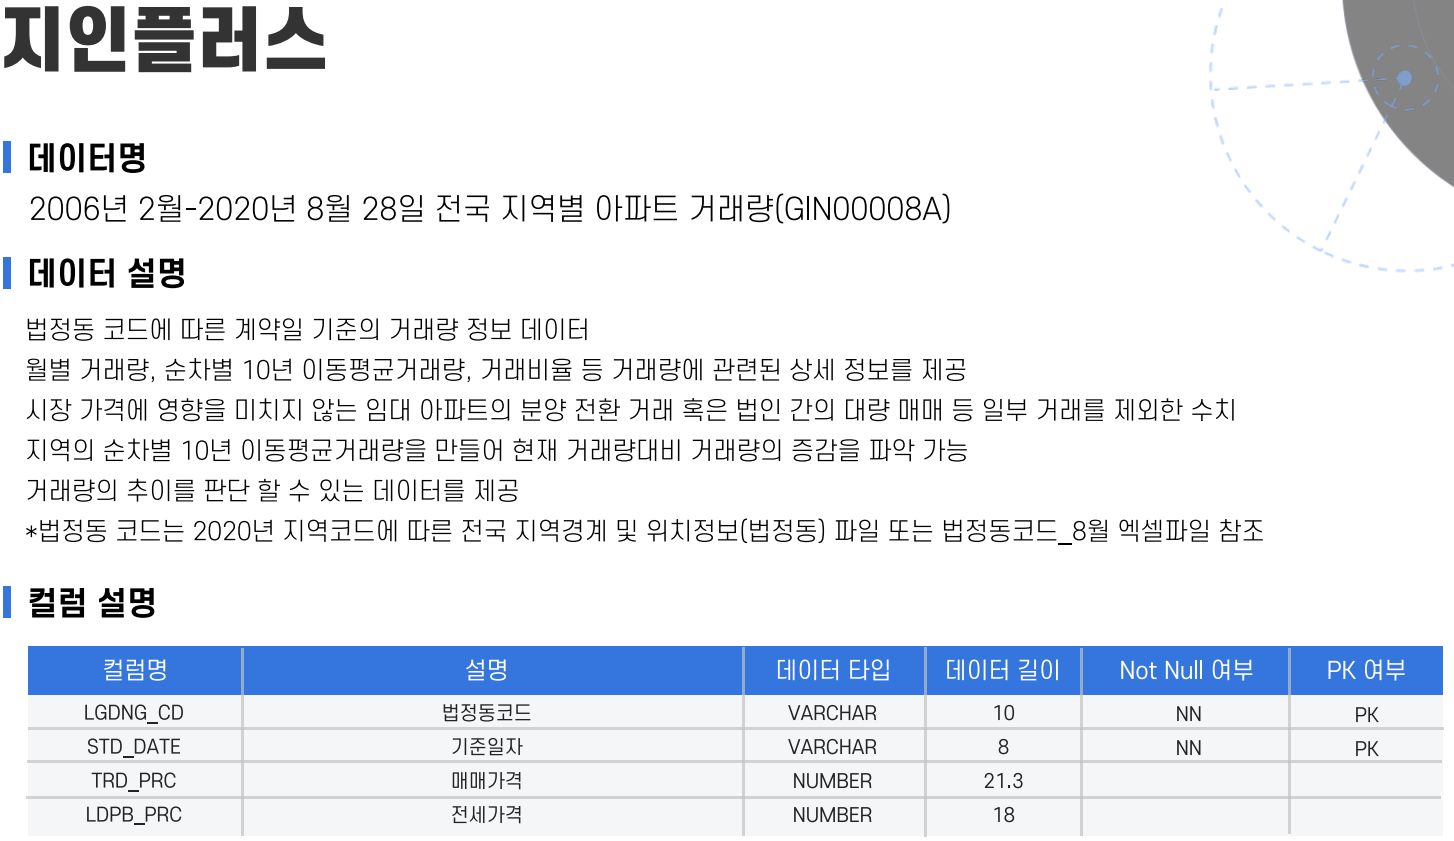

In [3]:
apt_amountdiet={'lgdng_cd':'법정동코드','std_date':'기준일자','trd_prc':'매매가격','ldpb_prc':'전세가격'}
apt_amount = pd.read_csv("./sample/GIN00009A.csv",parse_dates=['std_date'])
apt_amount=apt_amount.rename(columns=apt_amountdiet)

In [4]:
#날짜 수정
apt_amount['년']=apt_amount['기준일자'].dt.year
apt_amount['월']=apt_amount['기준일자'].dt.month
apt_amount['일']=apt_amount['기준일자'].dt.day
apt_amount=apt_amount.drop(['기준일자'],axis=1)

In [5]:
apt_amount=apt_amount[apt_amount['일']==21] #기준일은 21일로 정함
apt_amount=apt_amount.drop(['일'],axis=1)

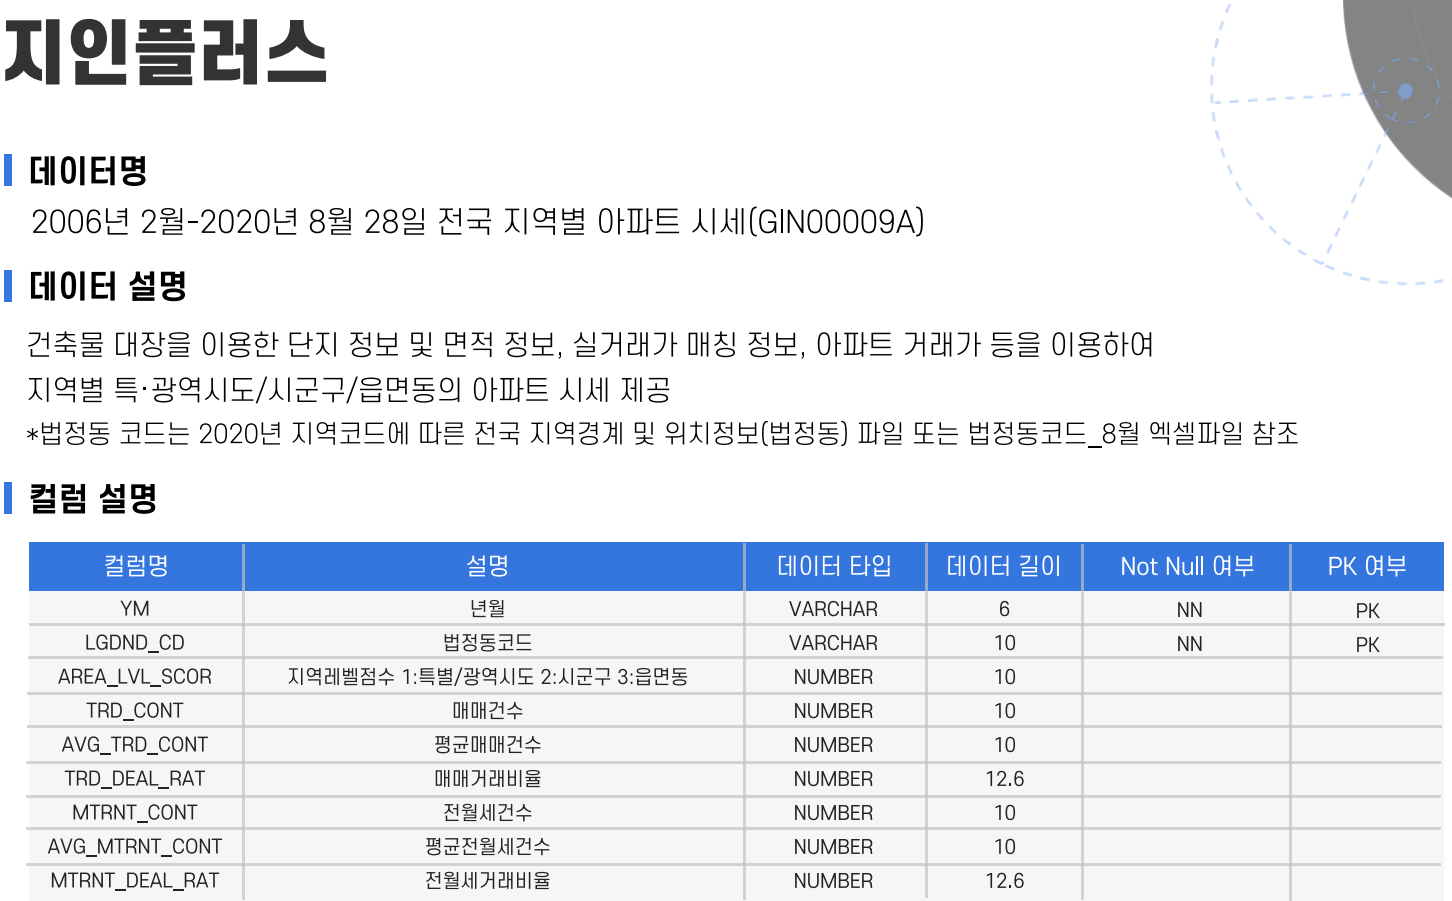

In [6]:
apt_pricediet={'ym':'년월','area_lvl_scor':'지역레벨점수','lgdng_cd':'법정동코드','trd_cont':'매매건수','avg_trd_cont':'평균매매건수','trd_deal_rat':'매매거래비율','mtrnt_cont':'전월세건수','avg_mtrnt_cont':'평균전월세건수','mtrnt_deal_rat':'전월세거래비율'}
apt_price = pd.read_csv("./sample/GIN00008A.csv",parse_dates=['ym'])
apt_price=apt_price.rename(columns=apt_pricediet)

In [7]:
# area_lvl_scor 지역점수 [1,2,3]으로 되어 있다 0은 제외
print(apt_price['지역레벨점수'].unique())
apt_price=apt_price[apt_price['지역레벨점수']!=0]

[0 1 2 3]


In [8]:
#날짜 수정
apt_price['년']=apt_price['년월'].apply(lambda x : int(x[0:4]) )
apt_price['월']=apt_price['년월'].apply(lambda x : int(x[4:6]) )

In [9]:
apts=apt_amount.merge(apt_price)

In [10]:
apts['법정동코드']=apts['법정동코드'].astype('category')
apts['지역레벨점수']=apts['지역레벨점수'].astype('category')

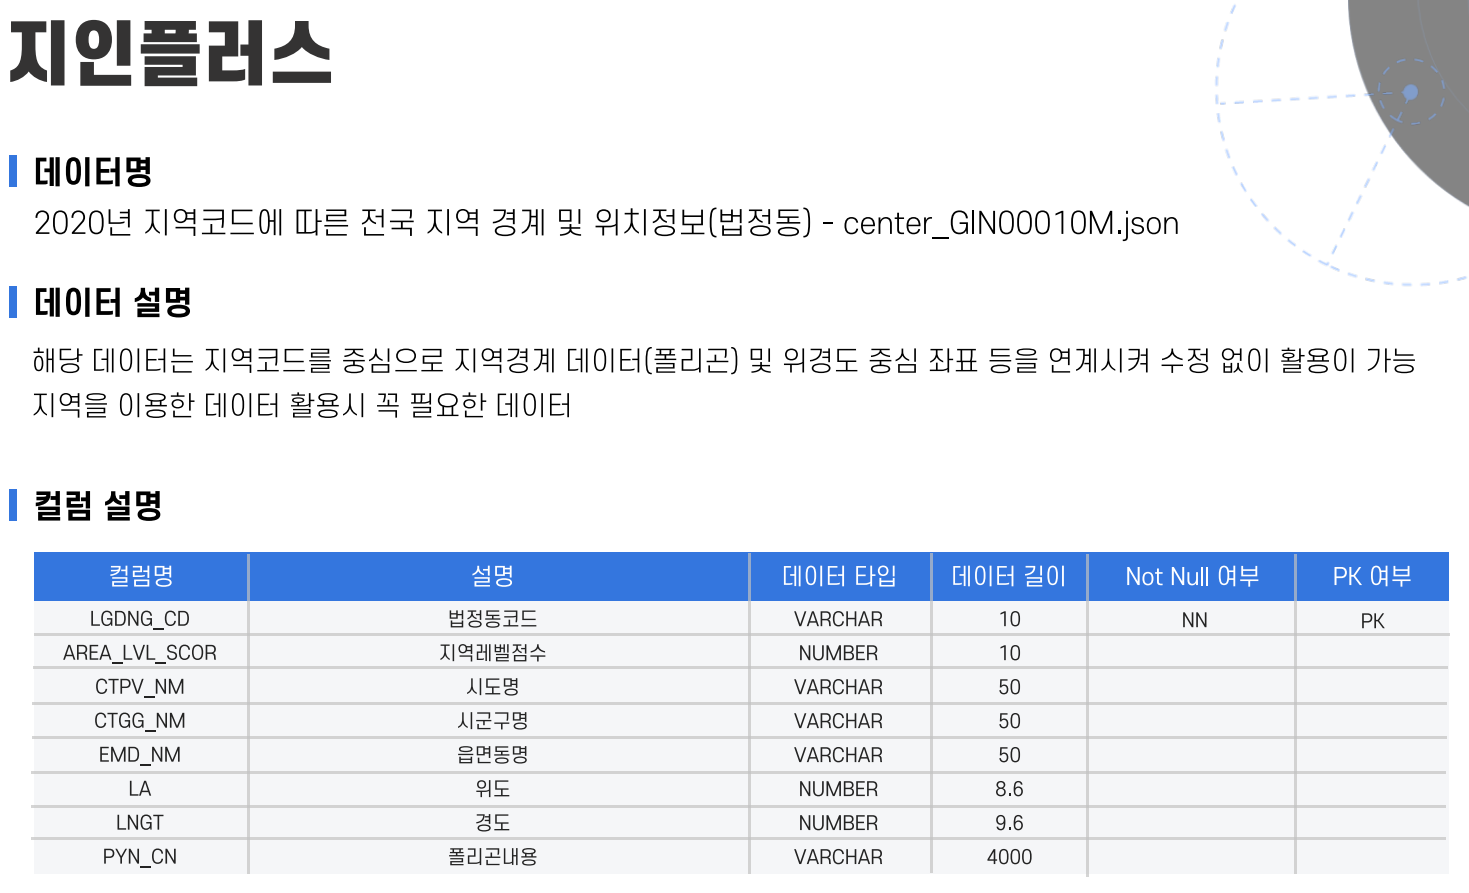

In [11]:
regiondiet={'AREA_LVL_SCOR':'지역레벨점수','LGDNG_CD':'법정동코드','CTPV_NM':'시도명','CTGG_NM':'시군구명','EMD_NM':'읍면동명','LA':'위도','LNGT':'경도','PYN_CN':'폴리곤내용'}
region = pd.read_json("./sample/center_GIN00010M.json")
region=region.rename(columns=regiondiet)

In [12]:
# reg = pd.read_json("./sample/center_GIN00010M.json")
# reg=reg[(reg['AREA_LVL_SCOR']==2) & (reg['CTPV_NM']=='경기도') | (reg['CTPV_NM']=='서울특별시')]
# # reg=reg[(reg['AREA_LVL_SCOR']==1)]
# reg['PYN_CN'].str[-1].values


In [13]:
# temp=[]
# for i in reg.index:
#     features={}
#     features["type"]="Feature"
#     features["properties"]={"AREA_LVL_SCOR":reg["AREA_LVL_SCOR"][i],"LGDNG_CD":reg["LGDNG_CD"][i],"CTPV_NM":reg["CTPV_NM"][i],"CTGG_NM":reg["CTGG_NM"][i],"EMD_NM":reg["EMD_NM"][i],"LA":reg["LA"][i],"LNGT":reg["LNGT"][i]}
#     features["geometry"]=eval(reg["PYN_CN"][i])
#     temp.append(features)
# geo_data={
# "type": "FeatureCollection",
# "crs": { "type": "name", "properties": { "name": "urn:ogc:def:crs:OGC:1.3:CRS84" } },
# "features":temp}

In [14]:
# geo_data

In [15]:
# f=open('geo_data.txt','w')
# f.write(str(geo_data))
# f.close()

In [16]:
apts=apts.merge(region)

In [17]:
apts['전월세건수'][apts['전세가격'].isnull()]=np.nan
apts['평균전월세건수'][apts['전월세거래비율'].isnull()]=np.nan

In [18]:
apts['년월']=apts['년월'].astype('int64')
apts=apts[apts['년월']>201012]

In [19]:
a1=apts[apts['지역레벨점수']==1]
a1

법정동코드    매매가격   전세가격     년  월      년월  지역레벨점수  매매건수  평균매매건수  \
60      1100000000  1627.0  805.0  2011  1  201101       1  6999    5340   
61      1100000000  1631.0  801.0  2011  2  201102       1  5939    5903   
62      1100000000  1631.0  804.0  2011  3  201103       1  5285    8165   
63      1100000000  1628.0  808.0  2011  4  201104       1  3979    7344   
64      1100000000  1625.0  814.0  2011  5  201105       1  3686    6122   
...            ...     ...    ...   ... ..     ...     ...   ...     ...   
396955  5000000000  1169.0  720.0  2020  4  202004       1   154     276   
396956  5000000000  1170.0  721.0  2020  5  202005       1   190     235   
396957  5000000000  1172.0  721.0  2020  6  202006       1   307     285   
396958  5000000000  1191.0  726.0  2020  7  202007       1   288     241   
396959  5000000000  1192.0  727.0  2020  8  202008       1    98     248   

        매매거래비율    전월세건수  평균전월세건수  전월세거래비율      시도명  시군구명  읍면동명         위도  \
60      131.07  14845.0      NaN      NaN    서울특별시  None  None  37.529343   
61      100.61  14970.0      NaN      NaN    서울특별시  None  None  37.529343   
62       64.73  14893.0      NaN      NaN    서울특별시  None  None  37.529343   
63       54.18  11962.0      NaN      NaN    서울특별시  None  None  37.529343   
64       60.21  11443.0      NaN      NaN    서울특별시  None  None  37.529343   
...        ...      ...      ...      ...      ...   ...   ...        ...   
396955   55.80    273.0    217.0   125.81  제주특별자치도  None  None  33.386383   
396956   80.85    222.0    152.0   146.05  제주특별자치도  None  None  33.386383   
396957  107.72    230.0    153.0   150.33  제주특별자치도  None  None  33.386383   
396958  119.50    213.0    152.0   140.13  제주특별자치도  None  None  33.386383   
396959   39.52    123.0    181.0    67.96  제주특별자치도  None  None  33.386383   

                경도                                              폴리곤내용  
60      126.951488  {"type": "Polygon", "coordinates": [[[126.9796...  
61      126.951488  {"type": "Polygon", "coordinates": [[[126.9796...  
62      126.951488  {"type": "Polygon", "coordinates": [[[126.9796...  
63      126.951488  {"type": "Polygon", "coordinates": [[[126.9796...  
64      126.951488  {"type": "Polygon", "coordinates": [[[126.9796...  
...            ...                                                ...  
396955  126.548687  {"type": "MultiPolygon", "coordinates": [[[[12...  
396956  126.548687  {"type": "MultiPolygon", "coordinates": [[[[12...  
396957  126.548687  {"type": "MultiPolygon", "coordinates": [[[[12...  
396958  126.548687  {"type": "MultiPolygon", "coordinates": [[[[12...  
396959  126.548687  {"type": "MultiPolygon", "coordinates": [[[[12...  

[1972 rows x 19 columns]

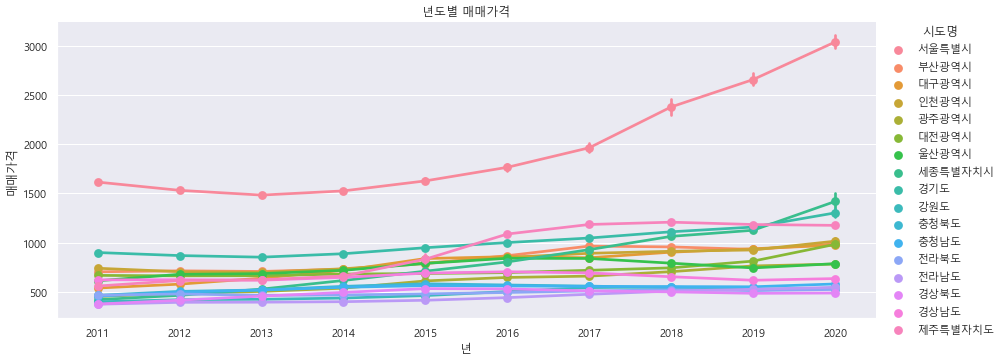

In [20]:
sns.factorplot(x='년',y='매매가격',hue='시도명',aspect=2.5,data=a1)
plt.title('년도별 매매가격')
plt.show()

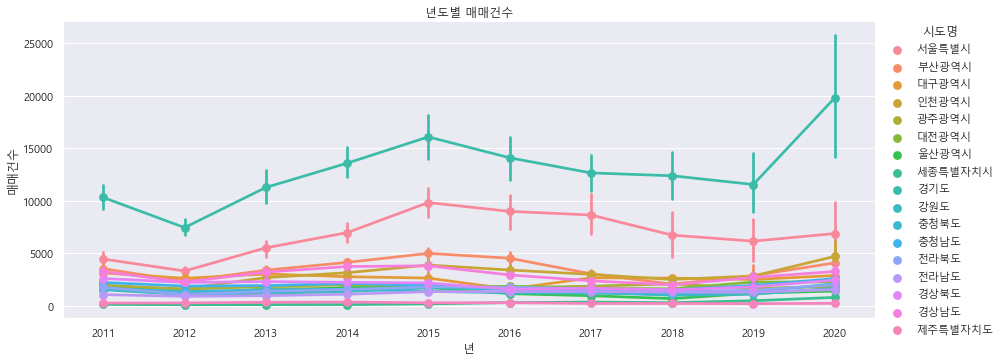

In [21]:
sns.factorplot(x='년',y='매매건수',hue='시도명',aspect=2.5,data=a1)
plt.title('년도별 매매건수')
plt.show()

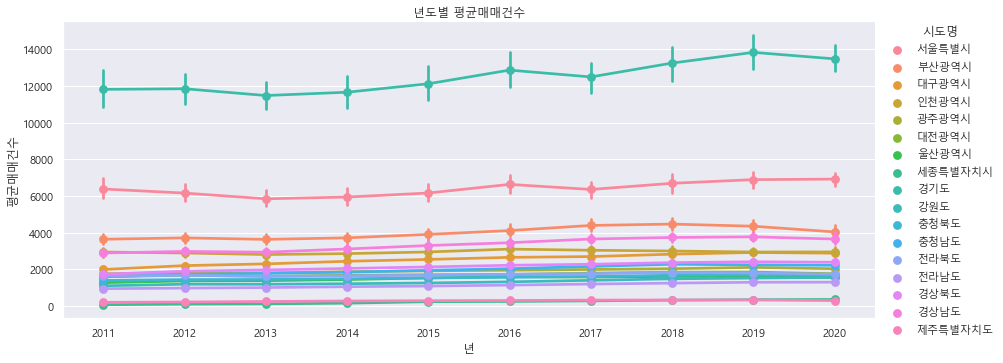

In [22]:
sns.factorplot(x='년',y='평균매매건수',hue='시도명',aspect=2.5,data=a1)
plt.title('년도별 평균매매건수')
plt.show()

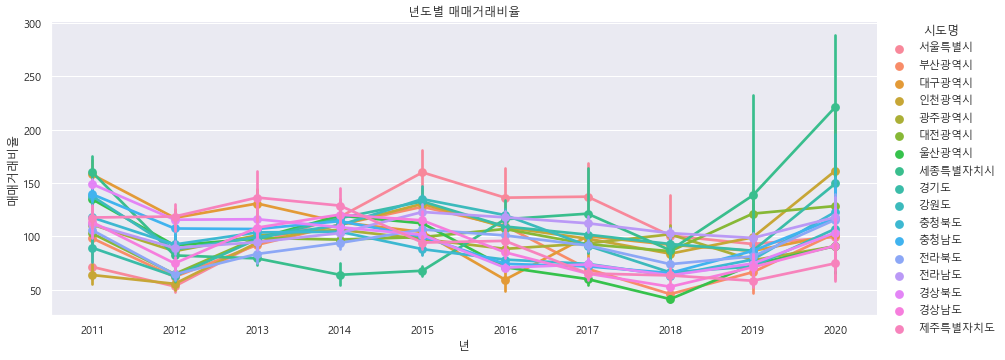

In [23]:
sns.factorplot(x='년',y='매매거래비율',hue='시도명',aspect=2.5,data=a1)
plt.title('년도별 매매거래비율')
plt.show()

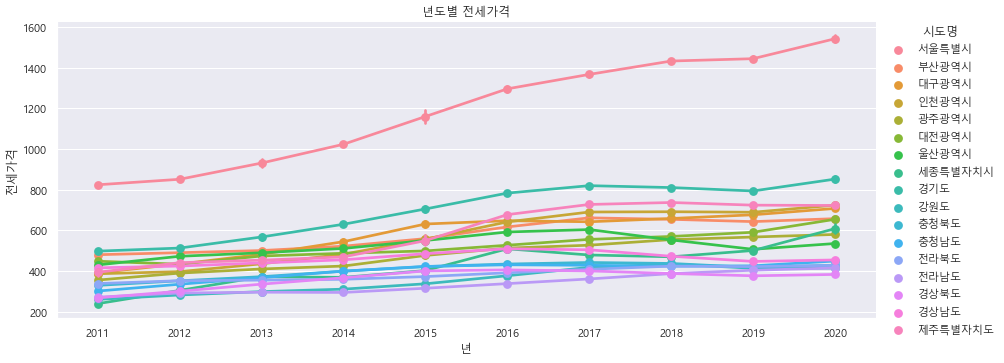

In [24]:
sns.factorplot(x='년',y='전세가격',hue='시도명',aspect=2.5,data=a1)
plt.title('년도별 전세가격')
plt.show()

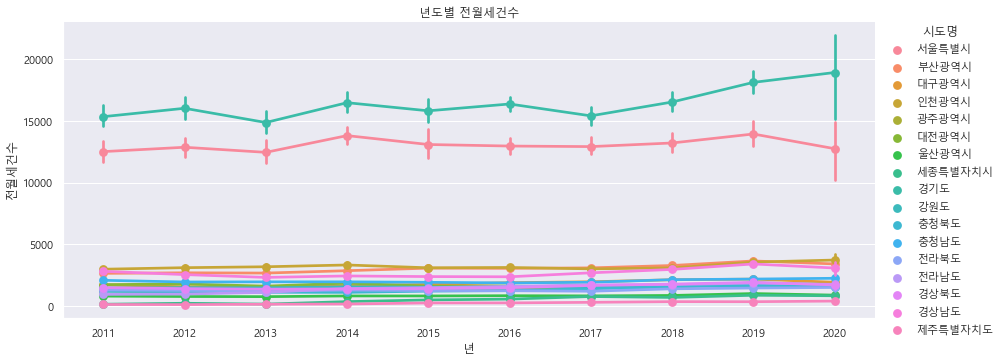

In [25]:
sns.factorplot(x='년',y='전월세건수',hue='시도명',aspect=2.5,data=a1)
plt.title('년도별 전월세건수')
plt.show()

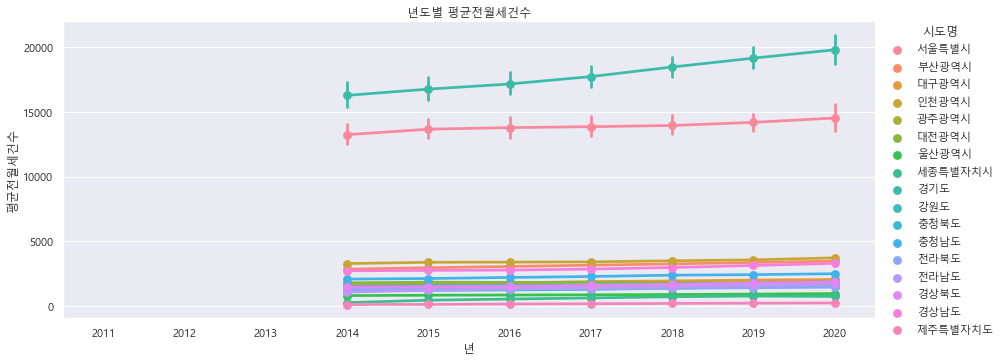

In [26]:
sns.factorplot(x='년',y='평균전월세건수',hue='시도명',aspect=2.5,data=a1)
plt.title('년도별 평균전월세건수')
plt.show()

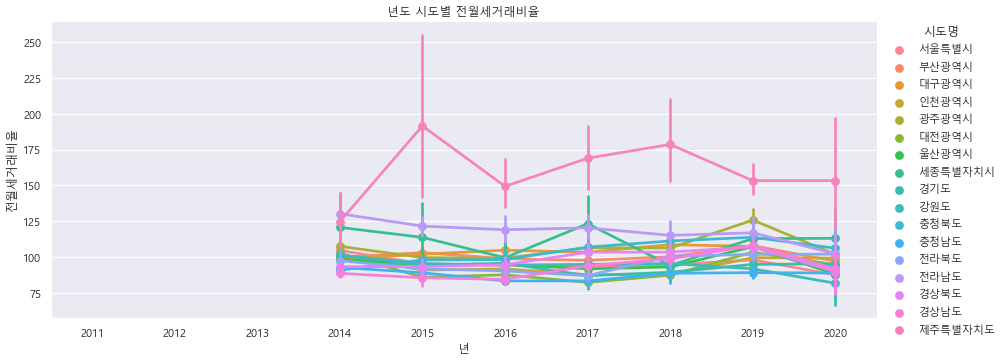

In [27]:
sns.factorplot(x='년',y='전월세거래비율',hue='시도명',aspect=2.5,data=a1)
plt.title('년도 시도별 전월세거래비율')
plt.show()

In [28]:
a1_2020=a1[a1['년월']==202002]
a1_2020
a1_2019=a1[a1['년월']==201902]
a1_2019

법정동코드    매매가격    전세가격     년  월      년월  지역레벨점수  매매건수  평균매매건수  \
157     1100000000  2588.0  1434.0  2019  2  201902       1  1450    6587   
48866   2600000000   937.0   650.0  2019  2  201902       1  1644    3965   
69447   2700000000   934.0   669.0  2019  2  201902       1  1667    2885   
88825   2800000000   921.0   690.0  2019  2  201902       1  1846    2703   
104142  2900000000   758.0   569.0  2019  2  201902       1  1405    2208   
117438  3000000000   776.0   582.0  2019  2  201902       1  1273    1808   
133087  3100000000   747.0   515.0  2019  2  201902       1   806    1578   
142865  3600000000  1113.0   511.0  2019  2  201902       1   191     330   
145008  4100000000  1153.0   797.0  2019  2  201902       1  5766   13076   
224227  4200000000   535.0   422.0  2019  2  201902       1   892    1501   
244653  4300000000   523.0   420.0  2019  2  201902       1   997    1716   
261337  4400000000   549.0   422.0  2019  2  201902       1  1425    2240   
283826  4500000000   513.0   425.0  2019  2  201902       1  1227    1897   
306245  4600000000   519.0   398.0  2019  2  201902       1  1317    1298   
326323  4700000000   487.0   380.0  2019  2  201902       1  1376    2437   
356801  4800000000   623.0   459.0  2019  2  201902       1  2097    3746   
396941  5000000000  1197.0   732.0  2019  2  201902       1   121     333   

        매매거래비율    전월세건수  평균전월세건수  전월세거래비율      시도명  시군구명  읍면동명         위도  \
157      22.01  14443.0  16179.0    89.27    서울특별시  None  None  37.529343   
48866    41.46   3938.0   3543.0   111.15    부산광역시  None  None  35.200289   
69447    57.78   2203.0   2201.0   100.09    대구광역시  None  None  35.871380   
88825    68.29   3626.0   3835.0    94.55    인천광역시  None  None  37.566548   
104142   63.63   1601.0   1594.0   100.44    광주광역시  None  None  35.151419   
117438   70.41   1854.0   2149.0    86.27    대전광역시  None  None  36.317378   
133087   51.08    984.0    940.0   104.68    울산광역시  None  None  35.572186   
142865   57.88    815.0    743.0   109.69  세종특별자치시  None  None  36.645918   
145008   44.10  16797.0  21453.0    78.30      경기도  None  None  37.238209   
224227   59.43   1913.0   2121.0    90.19      강원도  None  None  37.791198   
244653   58.10   1804.0   1704.0   105.87     충청북도  None  None  36.909769   
261337   63.62   2425.0   2891.0    83.88     충청남도  None  None  36.631320   
283826   64.68   1365.0   1544.0    88.41     전라북도  None  None  35.755078   
306245  101.46   2731.0   1941.0   140.70     전라남도  None  None  34.844839   
326323   56.46   2228.0   2136.0   104.31     경상북도  None  None  36.499666   
356801   55.98   3529.0   3449.0   102.32     경상남도  None  None  35.370516   
396941   36.34    379.0    269.0   140.89  제주특별자치도  None  None  33.386383   

                경도                                              폴리곤내용  
157     126.951488  {"type": "Polygon", "coordinates": [[[126.9796...  
48866   129.063162  {"type": "MultiPolygon", "coordinates": [[[[12...  
69447   128.601805  {"type": "Polygon", "coordinates": [[[128.6960...  
88825   126.416846  {"type": "MultiPolygon", "coordinates": [[[[12...  
104142  126.835557  {"type": "Polygon", "coordinates": [[[126.7602...  
117438  127.416185  {"type": "Polygon", "coordinates": [[[127.3981...  
133087  129.230066  {"type": "Polygon", "coordinates": [[[129.3463...  
142865  127.240654  {"type": "Polygon", "coordinates": [[[127.1784...  
145008  127.135507  {"type": "MultiPolygon", "coordinates": [[[[12...  
224227  128.336831  {"type": "Polygon", "coordinates": [[[128.6426...  
244653  127.749729  {"type": "Polygon", "coordinates": [[[128.2077...  
261337  126.742306  {"type": "MultiPolygon", "coordinates": [[[[12...  
283826  127.140090  {"type": "MultiPolygon", "coordinates": [[[[12...  
306245  126.900612  {"type": "MultiPolygon", "coordinates": [[[[12...  
326323  128.934338  {"type": "Polygon", "coordinates": [[[129.5789...  
356801  128.228186  {"type": "MultiPolygon", "coordinates": [[[[12...  
396941  126.548

In [29]:
center = [35.9, 127.986]
m = folium.plugins.DualMap(location=center,zoom_start=7)
folium.Choropleth( geo_data='CTPV.geojson',data=a1_2019,
                  key_on='feature.properties.CTPV_NM',columns=('시도명', '매매가격'),
                  fill_color='OrRd', legend_name='매매가격').add_to(m.m1)
plugins.MarkerCluster(a1_2019[['위도','경도']].values,
                      popups = list(a1_2019[['시도명','매매가격']].values)).add_to(m.m1)
folium.Choropleth( geo_data='CTPV.geojson',data=a1_2020,
                  key_on='feature.properties.CTPV_NM',columns=('시도명', '매매가격'),
                  fill_color='OrRd', legend_name='매매가격').add_to(m.m2)
plugins.MarkerCluster(a1_2020[['위도','경도']].values,
                      popups = list(a1_2020[['시도명','매매가격']].values)).add_to(m.m2)
m

In [30]:
center = [35.9, 127.986]
m = folium.plugins.DualMap(location=center,zoom_start=7)
folium.Choropleth( geo_data='CTPV.geojson',data=a1_2019,
                  key_on='feature.properties.CTPV_NM',columns=('시도명', '매매건수'),
                  fill_color='BuGn', legend_name='매매건수').add_to(m.m1)
plugins.MarkerCluster(a1_2019[['위도','경도']].values,
                      popups = list(a1_2019[['시도명','매매건수']].values)).add_to(m.m1)
folium.Choropleth( geo_data='CTPV.geojson',data=a1_2020,
                  key_on='feature.properties.CTPV_NM',columns=('시도명', '매매건수'),
                  fill_color='BuGn', legend_name='매매건수').add_to(m.m2)
plugins.MarkerCluster(a1_2020[['위도','경도']].values,
                      popups = list(a1_2020[['시도명','매매건수']].values)).add_to(m.m2)
m

In [31]:
center = [35.9, 127.986]
m = folium.plugins.DualMap(location=center,zoom_start=7)
folium.Choropleth( geo_data='CTPV.geojson',data=a1_2019,
                  key_on='feature.properties.CTPV_NM',columns=('시도명', '전세가격'),
                  fill_color='OrRd', legend_name='전세가격').add_to(m.m1)
plugins.MarkerCluster(a1_2019[['위도','경도']].values,
                      popups = list(a1_2019[['시도명','전세가격']].values)).add_to(m.m1)
folium.Choropleth( geo_data='CTPV.geojson',data=a1_2020,
                  key_on='feature.properties.CTPV_NM',columns=('시도명', '전세가격'),
                  fill_color='OrRd', legend_name='전세가격').add_to(m.m2)
plugins.MarkerCluster(a1_2020[['위도','경도']].values,
                      popups = list(a1_2020[['시도명','전세가격']].values)).add_to(m.m2)
m

In [32]:
center = [35.9, 127.986]
m = folium.plugins.DualMap(location=center,zoom_start=7)
folium.Choropleth( geo_data='CTPV.geojson',data=a1_2019,
                  key_on='feature.properties.CTPV_NM',columns=('시도명', '전월세건수'),
                  fill_color='BuGn', legend_name='전월세건수').add_to(m.m1)
plugins.MarkerCluster(a1_2019[['위도','경도']].values,
                      popups = list(a1_2019[['시도명','전월세건수']].values)).add_to(m.m1)
folium.Choropleth( geo_data='CTPV.geojson',data=a1_2020,
                  key_on='feature.properties.CTPV_NM',columns=('시도명', '전월세건수'),
                  fill_color='BuGn', legend_name='전월세건수').add_to(m.m2)
plugins.MarkerCluster(a1_2020[['위도','경도']].values,
                      popups = list(a1_2020[['시도명','전월세건수']].values)).add_to(m.m2)
m


In [33]:
a2=apts[(apts['지역레벨점수']==2) & (apts['시도명']=='서울특별시')]
a2

법정동코드    매매가격    전세가격     년  월      년월  지역레벨점수  매매건수  평균매매건수  \
236    1111000000  1564.0   877.0  2011  1  201101       2    51      34   
237    1111000000  1568.0   863.0  2011  2  201102       2    48      47   
238    1111000000  1566.0   878.0  2011  3  201103       2    68      62   
239    1111000000  1555.0   872.0  2011  4  201104       2    30      56   
240    1111000000  1549.0   880.0  2011  5  201105       2    31      51   
...           ...     ...     ...   ... ..     ...     ...   ...     ...   
47158  1174000000  2957.0  1441.0  2020  4  202004       2   123     371   
47159  1174000000  2972.0  1456.0  2020  5  202005       2   285     424   
47160  1174000000  3037.0  1484.0  2020  6  202006       2   848     378   
47161  1174000000  3149.0  1542.0  2020  7  202007       2   546     442   
47162  1174000000  3234.0  1600.0  2020  8  202008       2   116     436   

       매매거래비율  전월세건수  평균전월세건수  전월세거래비율    시도명 시군구명  읍면동명         위도  \
236    150.00  128.0      NaN      NaN  서울특별시  종로구  None  37.585862   
237    102.13  102.0      NaN      NaN  서울특별시  종로구  None  37.585862   
238    109.68   84.0      NaN      NaN  서울특별시  종로구  None  37.585862   
239     53.57   83.0      NaN      NaN  서울특별시  종로구  None  37.585862   
240     60.78   65.0      NaN      NaN  서울특별시  종로구  None  37.585862   
...       ...    ...      ...      ...    ...  ...   ...        ...   
47158   33.15  716.0    801.0    89.39  서울특별시  강동구  None  37.550548   
47159   67.22  625.0    901.0    69.37  서울특별시  강동구  None  37.550548   
47160  224.34  568.0    899.0    63.18  서울특별시  강동구  None  37.550548   
47161  123.53  468.0    809.0    57.85  서울특별시  강동구  None  37.550548   
47162   26.61  216.0    905.0    23.87  서울특별시  강동구  None  37.550548   

               경도                                              폴리곤내용  
236    126.977537  {"type": "Polygon", "coordinates": [[[127.0117...  
237    126.977537  {"type": "Polygon", "coordinates": [[[127.0117...  
238    126.977537  {"type": "Polygon", "coordinates": [[[127.0117...  
239    126.977537  {"type": "Polygon", "coordinates": [[[127.0117...  
240    126.977537  {"type": "Polygon", "coordinates": [[[127.0117...  
...           ...                                                ...  
47158  127.127651  {"type":"Polygon","coordinates":[[[127.1349633...  
47159  127.127651  {"type":"Polygon","coordinates":[[[127.1349633...  
47160  127.127651  {"type":"Polygon","coordinates":[[[127.1349633...  
47161  127.127651  {"type":"Polygon","coordinates":[[[127.1349633...  
47162  127.127651  {"type":"Polygon","coordinates":[[[127.1349633...  

[2900 rows x 19 columns]

In [ ]:
sns.factorplot(x='년',y='매매가격',hue='시군구명',aspect=2.5,data=a2)
plt.title('서울시 구별 매매가격')
plt.show()

In [ ]:
sns.factorplot(x='년',y='매매건수',hue='시군구명',aspect=2.5,data=a2)
plt.title('서울시 구별 매매건수')
plt.show()

In [ ]:
sns.factorplot(x='년',y='평균매매건수',hue='시군구명',aspect=2.5,data=a2)
plt.title('서울시 구별 평균매매건수')
plt.show()

In [ ]:
sns.factorplot(x='년',y='매매거래비율',hue='시군구명',aspect=2.5,data=a2)
plt.title('서울시 구별 매매거래비율')
plt.show()

In [ ]:
sns.factorplot(x='년',y='전세가격',hue='시군구명',aspect=2.5,data=a2)
plt.title('서울시 구별 전세가격')
plt.show()

In [ ]:
sns.factorplot(x='년',y='전월세건수',hue='시군구명',aspect=2.5,data=a2)
plt.title('서울시 구별 전월세건수')
plt.show()

In [ ]:
sns.factorplot(x='년',y='평균전월세건수',hue='시군구명',aspect=2.5,data=a2)
plt.title('서울시 구별 평균전월세건수')
plt.show()

In [ ]:
sns.factorplot(x='년',y='전월세거래비율',hue='시군구명',aspect=2.5,data=a2)
plt.title('서울시 구별 전월세거래비율')
plt.show()

In [ ]:
a2_2020=a2[a2['년월']==202002]
a2_2020
a2_2019=a2[a2['년월']==201902]
a2_2019

In [ ]:
center = [37.541, 126.986]
m = folium.plugins.DualMap(location=center, zoom_start=11)
folium.Choropleth( geo_data='CTGG.geojson',data=a2_2019,
                  key_on='feature.properties.CTGG_NM',columns=('시군구명', '매매가격'),
                  fill_color='OrRd', legend_name='매매가격').add_to(m.m1)
plugins.MarkerCluster(a2_2019[['위도','경도']].values,
                      popups = list(a2_2019[['시군구명','매매가격']].values)).add_to(m.m1)
folium.Choropleth( geo_data='CTGG.geojson',data=a2_2020,
                  key_on='feature.properties.CTGG_NM',columns=('시군구명', '매매가격'),
                  fill_color='OrRd', legend_name='매매가격').add_to(m.m2)
plugins.MarkerCluster(a2_2020[['위도','경도']].values,
                      popups = list(a2_2020[['시군구명','매매가격']].values)).add_to(m.m2)
m

In [ ]:
center = [37.541, 126.986]
m = folium.plugins.DualMap(location=center, zoom_start=11)
folium.Choropleth( geo_data='CTGG.geojson',data=a2_2019,
                  key_on='feature.properties.CTGG_NM',columns=('시군구명', '매매건수'),
                  fill_color='BuGn', legend_name='매매건수').add_to(m.m1)
plugins.MarkerCluster(a2_2019[['위도','경도']].values,
                      popups = list(a2_2019[['시군구명','매매건수']].values)).add_to(m.m1)
folium.Choropleth( geo_data='CTGG.geojson',data=a2_2020,
                  key_on='feature.properties.CTGG_NM',columns=('시군구명', '매매건수'),
                  fill_color='BuGn', legend_name='매매건수').add_to(m.m2)
plugins.MarkerCluster(a2_2020[['위도','경도']].values,
                      popups = list(a2_2020[['시군구명','매매건수']].values)).add_to(m.m2)
m

In [ ]:
center = [37.541, 126.986]
m = folium.plugins.DualMap(location=center, zoom_start=11)
folium.Choropleth( geo_data='CTGG.geojson',data=a2_2019,
                  key_on='feature.properties.CTGG_NM',columns=('시군구명', '전세가격'),
                  fill_color='OrRd', legend_name='전세가격').add_to(m.m1)
plugins.MarkerCluster(a2_2019[['위도','경도']].values,
                      popups = list(a2_2019[['시군구명','전세가격']].values)).add_to(m.m1)
folium.Choropleth( geo_data='CTGG.geojson',data=a2_2020,
                  key_on='feature.properties.CTGG_NM',columns=('시군구명', '전세가격'),
                  fill_color='OrRd', legend_name='전세가격').add_to(m.m2)
plugins.MarkerCluster(a2_2020[['위도','경도']].values,
                      popups = list(a2_2020[['시군구명','전세가격']].values)).add_to(m.m2)
m

In [ ]:
center = [37.541, 126.986]
m = folium.plugins.DualMap(location=center, zoom_start=11)
folium.Choropleth( geo_data='CTGG.geojson',data=a2_2019,
                  key_on='feature.properties.CTGG_NM',columns=('시군구명', '전월세건수'),
                  fill_color='BuGn', legend_name='전월세건수').add_to(m.m1)
plugins.MarkerCluster(a2_2019[['위도','경도']].values,
                      popups = list(a2_2019[['시군구명','전월세건수']].values)).add_to(m.m1)
folium.Choropleth( geo_data='CTGG.geojson',data=a2_2020,
                  key_on='feature.properties.CTGG_NM',columns=('시군구명', '전월세건수'),
                  fill_color='BuGn', legend_name='전월세건수').add_to(m.m2)
plugins.MarkerCluster(a2_2020[['위도','경도']].values,
                      popups = list(a2_2020[['시군구명','전월세건수']].values)).add_to(m.m2)
m

In [ ]:
mylist=['매매가격','매매건수','전세가격','전월세건수']
for i in mylist:
    a2[i+'scale']=(a2[i]-a2[i].min())/(a2[i].max()-a2[i].min())

In [ ]:
a2['매매가격scale']*2
a2_pt=pd.pivot_table(a2,index=('년월','시군구명'),values=('경도','위도','매매가격scale'))
nl=[]
for i,j in a2_pt.index:
    temp=a2_pt.loc[i][['위도','경도','매매가격scale']].values.tolist()
    nl.append(temp)

In [ ]:
center = [37.541, 126.986]
m = folium.Map(location=center,tiles='stamentoner', zoom_start=11)
hm = plugins.HeatMapWithTime(nl,index=a2['년월'].values.tolist(), radius = 100)
hm.add_to(m)
m

In [ ]:
a2['매매건수scale']*2
a2_pt=pd.pivot_table(a2,index=('년월','시군구명'),values=('경도','위도','매매건수scale'))
nl=[]
for i,j in a2_pt.index:
    temp=a2_pt.loc[i][['위도','경도','매매건수scale']].values.tolist()
    nl.append(temp)
center = [37.541, 126.986]
m = folium.Map(location=center,tiles='stamentoner', zoom_start=11)
hm = plugins.HeatMapWithTime(nl,index=a2['년월'].values.tolist(), radius = 100)
hm.add_to(m)
m